## Ultimate Data Analysis Challenge
### Part 1: Exploratory Data Analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

#### Metadata Collection + Anomalies Analysis
First, we look at the size of the set and find any anomalies that may or may not exist in this data set.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
login_dict = json.load((open('logins.json')))

In [3]:
len(login_dict['login_time'])

93142

In [4]:
login_dict['login_time'][:5]

[u'1970-01-01 20:13:18',
 u'1970-01-01 20:16:10',
 u'1970-01-01 20:16:37',
 u'1970-01-01 20:16:36',
 u'1970-01-01 20:26:21']

In [5]:
login_dict['login_time'][-5:]

[u'1970-04-13 18:50:19',
 u'1970-04-13 18:43:56',
 u'1970-04-13 18:54:02',
 u'1970-04-13 18:57:38',
 u'1970-04-13 18:54:23']

In [6]:
#find string length
print(len(login_dict['login_time'][0]))

19


In [7]:
#check for anomalies in string length
for entry in login_dict['login_time']:
    if len(entry) != 19:
        print(entry)

From an initial analysis, we can see that there are no null values or anomalies in the timestamp format (different lengths, incompatible entries, etc). April only has login recordings for half of the month (until April 13), so we need to include this in our analysis when comparing April to the other months.

#### Aggregate and Analyze Data Set
We aggregate the data into 15-minute time intervals to make analysis easier. We create other datetime related columns to find more information about when our users tend to login to the service.

In [8]:
timestamp = pd.to_datetime(login_dict['login_time'])
login_df = pd.DataFrame(index=timestamp)
login_df['count'] = 1
login_df = login_df.resample('15T').sum()
login_df['hour'] = login_df.index.strftime('%-H')
login_df['weekday'] = login_df.index.strftime('%A')
login_df['monthday'] = login_df.index.strftime('%-d')
login_df['month'] = login_df.index.strftime('%B')
login_df['weeknum'] = login_df.index.strftime('%W')
login_df.head()

,count,hour,weekday,monthday,month,weeknum
1970-01-01 20:00:00,2,20,Thursday,1,January,00
1970-01-01 20:15:00,6,20,Thursday,1,January,00
1970-01-01 20:30:00,9,20,Thursday,1,January,00
1970-01-01 20:45:00,7,20,Thursday,1,January,00
1970-01-01 21:00:00,1,21,Thursday,1,January,00


In [9]:
login_df.shape

(9788, 6)

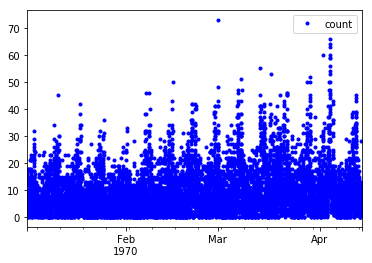

In [10]:
login_df.plot(style='b.')
plt.show()

From this initial plot, we can see that there are certain weekdays that tend to have more logins because there are columns of dots that are relatively even spaced in the plot. There is a peak in logins in the beginning of April, and then the logins steeply drop off after that day.

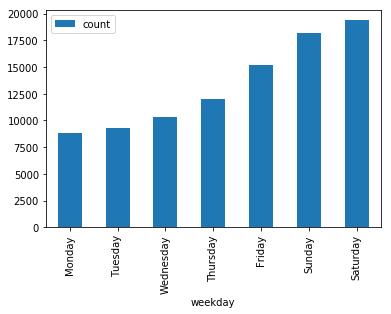

In [11]:
login_df.groupby('weekday').sum().sort_values('count').plot(kind='bar')

We have almost double the number of logins on Saturday (end of the week) compared to Monday (beginning of the week). We can infer that our users are more likely to login on the weekends, rather than the weekdays.

This could explain the tall columns of dot in our initial plot, as the talls columns of dots tend to come in pairs or triplets. Friday and Sunday also have almost 1.5x to 2x the amount of logins, which further supports the correlation between the columns of dots and the weekday login patterns we discovered from this bar chart.

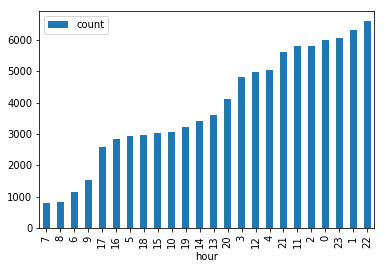

In [12]:
login_df.groupby('hour').sum().sort_values('count').plot(kind='bar')

We see the most number of logins occur late at night, with the peak login occurring at 10 pm. The time frame with the most login count is from 9 pm to 4 am (late night/early morning), and 11 am to 12 pm (lunchtime). There are significantly less logins during the morning, work hours and evening times. This means that our demand is highest during night and lunch.

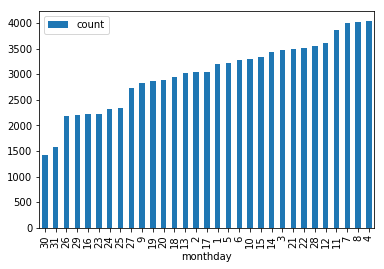

In [13]:
login_df.groupby('monthday').sum().sort_values('count').plot(kind='bar')

Logins tends to peak during the beginning of the month, and drop off towards the end of the month. The last ten days of th emonth have the lowest number of logins, with a drop off in logins occurring in the last two days. This could be due to the fact that we only have full data for three months, one of which is February (and only goes until the 29th). Either way, targetting users to login in during the last two weeks of the month could benefit the company to maintain user engagement throughout the month.

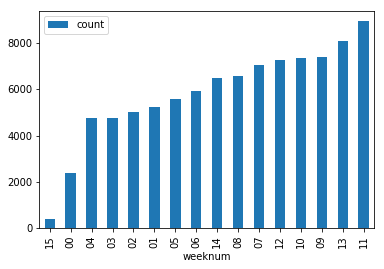

In [14]:
login_df.groupby('weeknum').sum().sort_values('count').plot(kind='bar')

We see that we had the highest number of logins in the middle and last week of March. The last week, which was the second week of April in 1970, had the lowest amount of logins (the week runs from April 6 - 12). Logins increased after the first month, and remained steadily growing until the peak in mid March. Logins declined until a sharp decrease happened between weeks 14 and 15 (first and second weeks of April).

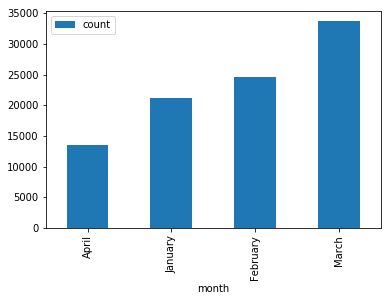

In [15]:
login_df.groupby('month').sum().sort_values('count').plot(kind='bar')

In [16]:
login_df.groupby('month').sum()

,count
month,
April,13507
February,24673
January,21239
March,33723


March had the most number of logins, however we need to consider the fact that we only have recordings for the first month of April. We can dig deeper into April to analyze the patterns and understand why the tallest column from our initial plot is in April, followed by a drop off in logins.

#### Deep Dive Analysis
Logins peaked in the middle of March and began rapidly declining until there were almost no logins in the last week of our data set. We analyze this timeframe to understand more about this pattern.

In [17]:
march_df = login_df[login_df['month'] == 'March']
march_df.head()

,count,hour,weekday,monthday,month,weeknum
1970-03-01 00:00:00,16,0,Sunday,1,March,08
1970-03-01 00:15:00,19,0,Sunday,1,March,08
1970-03-01 00:30:00,17,0,Sunday,1,March,08
1970-03-01 00:45:00,12,0,Sunday,1,March,08
1970-03-01 01:00:00,20,1,Sunday,1,March,08


In [18]:
march_df.groupby('monthday').sum().sort_values('count', ascending=False)[:10]

,count
monthday,
14,1706
7,1666
15,1565
29,1523
28,1488
21,1485
22,1472
19,1444
8,1434


In [19]:
april_df = login_df[login_df['month'] == 'April']
april_df.head()

,count,hour,weekday,monthday,month,weeknum
1970-04-01 00:00:00,15,0,Wednesday,1,April,13
1970-04-01 00:15:00,11,0,Wednesday,1,April,13
1970-04-01 00:30:00,14,0,Wednesday,1,April,13
1970-04-01 00:45:00,19,0,Wednesday,1,April,13
1970-04-01 01:00:00,16,1,Wednesday,1,April,13


In [20]:
april_df.groupby('monthday').sum().sort_values('count', ascending=False)[:10]

,count
monthday,
4,1889
3,1504
12,1409
11,1352
5,1162
2,1127
10,1009
1,939
9,818


By comparing the March and April data, we see that the highest records of logins happened on April 4. March averaged out to a higher number of logins, whereas the differences between login counts per day in April varied drastically.

In [21]:
march_april_df = login_df[(login_df['month'] == 'March') | (login_df['month'] == 'April')]

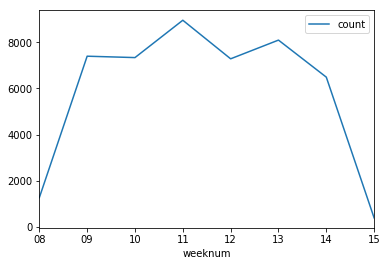

In [22]:
march_april_df.groupby('weeknum').sum().plot(kind='line')

This confirms what we saw earlier by showing us that March performed extremely well. That success carried on through the first week of April, however we saw a slight decline and then a sharp decline in the last two weeks of the recorded data.

#### Conclusion
Login patterns show that we have the highest engagement late at night, from 11 pm to 2 am, and lunch, 11 am to 12 pm. Our users are more likely to log in at the beginning of the month and our engagement was increasing steadily. However, we lost user engagement after we peaked on April 4, and user logins dropped to an all time low. 

This shows that we need to figure out how to get users to keep logging in throughout the month, particulary towards the end of the month, and that we need to get more data on what we did differently that encouraged users to log in more frequently (or the addition of new users) in mid March and April 4. 

### Part 2: Experiment + Metrics Design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

I would choose the amount of toll tickets issued on the toll road as the key metric of success. I would choose this metric because we can look at the data at a driver level for the number of toll tickets issued over time before and after the experiment (assuming that the city has this data, which should be available if the toll tickets are tracked electronically, as in most cities). If we look at this data and evaluate the number of toll tickets that Ultimate reimburses, we can know how many people using the toll road are Ultimate drivers. If this number increases at the start of the program and if it contributes significantly to any potential peaks that could, hypothetically, result from this experiment (if it is successful), then we can theorize that the Ultimate experiment is successful. From there, we can look at the rate of increase of toll tickets issued and set thresholds across increments of time (such as every week, or every month) to see if the program is spreading and becoming more successful, if Ultimate has reached saturation, or if there is another way that they can persuad more Ultimate driver partners to participate in this program.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:<br>
   >a. how you will implement the experiment <br>
   >b. what statistical test(s) you will conduct to verify the significance of the
observation <br>
   >c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats

a. I would implement the experiment by first gathering existing data related to toll tickets issued prior to the experiment. This is implementing an A/B test to determine if our hypothesis (that the toll program will increase driver partners availability across both cities). 

I would look at the prior three months to the program, just to understand the underlying patterns of the toll road before we started the experiment. If we do not have this, we can also split our program into a control and experimental group, where the experimental group is offered the toll program reimbursement, and the control is not. I would ensure there was an even split between both cities to avoid any biases.

Then, I would collect the following data: timestamp of toll ticket, toll ticket ID (which we assume comes on all toll tickets), toll ticket ID_reimbursed (which we gather from Ultimate's database of toll tickets they reimbursed from their drivers) and the city toll ticket was issued. I would continuously collect this data, but we will assume that we want to start with a three month timeframe for the initial analysis for simplicity. 

I would create a feature from this data by comparing the toll ticket ID with toll ticket ID_reimbursed to see if the toll ticket was issued to an Ultimate driver. I would then look at the ratio of Ultimate drivers that were issued a toll ticket over total toll tickets issued over 15 minute intervals, weeks, weekends and months. If this ratio is increasing, then we can further dig into which city has issued more tickets, and if there's a certain bias towards one city. 

Once we evaluate this, we can dig into specifics of the cities if we need to in order to understand why one city has more Ultimate drivers using the toll program over others (but this is an extension to our primary experiment).

b. We can use null hypothesis and look at the difference in means between the control and experimental group as well as calculate the p-value using Central Limit Theorem and theoretical quantiles plot.

c. Since we are implementing an A/B test, we can use test the null hypothesis and look at the distribution of the difference of the means between the control and experimental group. Our null hypothesis, for this experiment, is that the toll program did not contribute to more inter-city availability in Ultimate drivers. We record the difference in means beteween the control and experimental groups over 3 months worth of sample data and plot a histogram of these differences. We can perform a one-tailed test and look at our p-value (probability of observing what was ovserved if null hypothesis were true). The lower the p-value, the less likely it is that we just lucky with our experiment.

We can use the Central Limit Theorem (if you add up independent random variables, their normalized sum tends towards normal distribution as you sum more and more of them). We can plot the distribution to look for a normal distribution to help us calculate the p-value. We can also look at a plot of theoretical quantiles (Q-Q plot) to verify noramlity. We are looking for a straight line at 45 degrees from Q-Q plot, as this verifies that we have a normal distribution in the data (it does this by comparing the quantile of our distribution against that of the normal distribution). This helps us quickly calculate p-values.

We can check if our p-value is less than our alpha (cutoff). We define an alpha (p-value cutoff) below which we reject the null hypothesis and conclude that the observed effect is statistically significant.

We can calculate the test stastic and look at the standard error for further stastics regarding our experiment. The test statistic tells us how many standard deviations away from the null hypothesis value the observed value from our experiment is. We want this number to be higher so we know that there is a greater difference betweent the control and test group. Depending on whetehr we can reject the null hypothesis and how strong our test statistic is, we can determine the strength of our experiment and determine confidence in our experiment results.

### Part 3: Predictive Modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

In [23]:
drivers_data = json.load((open('ultimate_data_challenge.json')))

In [24]:
len(drivers_data)

50000

In [25]:
drivers_data[0]

{u'avg_dist': 3.67,
 u'avg_rating_by_driver': 5.0,
 u'avg_rating_of_driver': 4.7,
 u'avg_surge': 1.1,
 u'city': u"King's Landing",
 u'last_trip_date': u'2014-06-17',
 u'phone': u'iPhone',
 u'signup_date': u'2014-01-25',
 u'surge_pct': 15.4,
 u'trips_in_first_30_days': 4,
 u'ultimate_black_user': True,
 u'weekday_pct': 46.2}

In [26]:
drivers_df = pd.DataFrame(drivers_data)

In [27]:
drivers_df[:10]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


#### 1: Calculate Retention Rate
What fraction of the observed users were retained? Perform any cleaning, exploratory analysis and/or visualizaiton to use the provided data for this analysis. A few sentences/plots describing your approach will suffice.

In [28]:
null_count = drivers_df.isnull().sum()
null_count[null_count != 0]

avg_rating_by_driver     201
avg_rating_of_driver    8122
phone                    396
dtype: int64

In [29]:
len(drivers_df)

50000

In [30]:
from datetime import timedelta

drivers_df['last_trip_date'] = pd.to_datetime(drivers_df['last_trip_date'])
date_data_pulled = max(drivers_df['last_trip_date'])
date_data_pulled

Timestamp('2014-07-01 00:00:00')

In [31]:
cutoff_date = date_data_pulled - timedelta(days=30)
cutoff_date

Timestamp('2014-06-01 00:00:00')

In [32]:
active_user = []
for i in range(len(drivers_df)):
    if drivers_df['last_trip_date'][i] <= cutoff_date:
        active_user.append(1)
    else:
        active_user.append(0)
    
drivers_df = drivers_df.assign(active_user=active_user)

In [33]:
type(drivers_df['active_user'][0])

numpy.int64

In [34]:
active_users_count = len(drivers_df[drivers_df['active_user'] == 1])
retention_rate = float(active_users_count)/len(drivers_df)*100
print('The retention rate of Ultimate is ' + str(retention_rate) + '%')

The retention rate of Ultimate is 63.38%


#### 2: Predict User Activity
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [35]:
drivers_df['ultimate_black_user'] = drivers_df['ultimate_black_user'].astype(int)

In [39]:
phone_dict = {'iPhone': 1, 'Android': 0}
drivers_df = drivers_df.replace({'phone': phone_dict})

In [40]:
city_dict = {"King's Landing": 1, "Astapor": 2, "King's Landing": 3, "Winterfell": 4}
drivers_df = drivers_df.replace({'city': city_dict})

In [48]:
drivers_df = drivers_df.dropna()

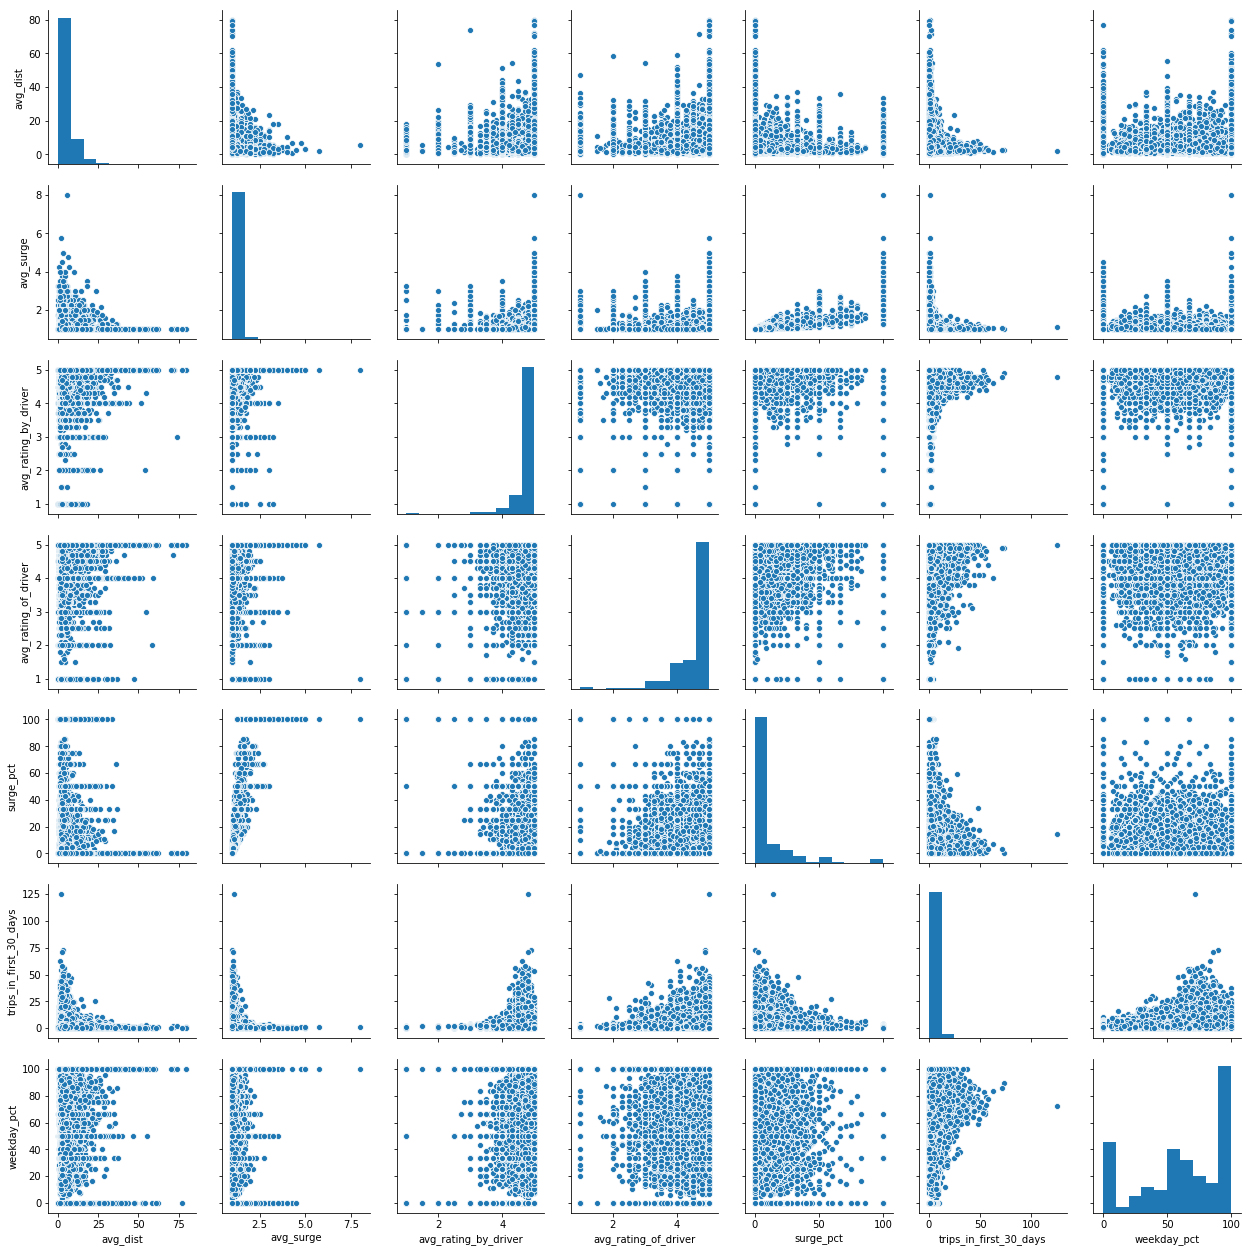

In [52]:
drivers_df_values = ['avg_dist', 'avg_surge', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']
sns.pairplot(drivers_df[drivers_df_values])

We can tell that there is an inverse non-linear relationship between the trips in the first 30 days and average distance. People who took the least amount of trips in the first 30 days traveled farther distances. We also see that the average surge also has an inverse non-linear relationship with trips in the first 30 days. Average surge increased as the trips made in the first 30 days decreased. Average rating of driver has a somewhat linear relationship with trips in first 30 days, and average rating by driver has an exponential relationship with trips in first 30 days - the ratings both way sincreased as the number of trips made in the first 30 days increased. Surge percentage has a similar trend to average surge, so these features may represent similar things. We can keep the average surge as it seems to give a stronger correlation with the first 30 days feature, which seems prominent. Average distance also seems like a prominent feature as it shows some interesting relationships. As our average distance increases, average surge decreases. As distance increases, the rating both by and of the driver increases.

In [114]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [115]:
data = drivers_df.drop(['active_user', 'last_trip_date', 'signup_date'], axis=1)

target = drivers_df['active_user'].astype(int)

In [116]:
float_cols = list(data.select_dtypes('float64').columns.values)
data[float_cols] = data[float_cols].applymap(np.int64)
data.dtypes

avg_dist                  int64
avg_rating_by_driver      int64
avg_rating_of_driver      int64
avg_surge                 int64
city                      int64
phone                     int64
surge_pct                 int64
trips_in_first_30_days    int64
ultimate_black_user       int64
weekday_pct               int64
dtype: object

In [155]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.3, random_state=42)

In [156]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.742239022036352

In [157]:
clf.feature_importances_

array([0.18438986, 0.10419984, 0.0513092 , 0.00247961, 0.09149941,
       0.04662648, 0.13332658, 0.1208873 , 0.03950813, 0.22577361])

In [160]:
features = ['avg_rating_by_driver', 'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct']
X_train, X_test, y_train, y_test = train_test_split(data[features], target, test_size= 0.3, random_state=42)
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7517291298053723

I chose to build a model using the Random Forest Classifier because it is easy to use and has the best performance in its default mode compared to other basic classifier systems, while preventing overfitting by using bagging. I chose these features based on the information given by the feature importances attribute and becasue we saw those same features predominant from our pairplot. The biggest concern is the accuracy of the model is still pretty low. Key indicators of performance include the accuracy score. 

#### 3: Discuss Strategy
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

Ultimate can use this model to figure out what aspects to focus on in order to boost retention, such as getting their users to use Ultimate over the weekdays, incentivizing them to get a better rating from their driver, targeting specific devices, and getting their users to become Ultimate Black members. They can use marketing campaigns, competitive pricing, discounts during the weekdays and reminders from drivers to rate their passengers in order to boost rider retention long term. They can also retrain this model after gathering more data to determine if other features may or may not be relevant to rider retention.